In [1]:
import numpy as np
import matplotlib.pyplot as plt

from persim import plot_diagrams

from BuZZ.ptclouds import PtClouds
from BuZZ.utils import time_delay_embedding

In [4]:
t = np.linspace(0, 6*np.pi+1, 50)

# Amplitudes of sine waves
amps = [0.1,0.5,1,1.5,2,1.5,1,0.5,0.1]

ts_list = []
ptcloud_list = []
for a in amps:
    # Compute sine wave and add noise uniformly distributed in [-0.1, 0.1]
    ts_list.append(a*np.sin(t) + (0.1*np.random.randint(-100,100,len(t))/100))
    
    # Compute time delay embedding point clouds
    ptcloud_list.append(time_delay_embedding(y, d=2, tau=4))

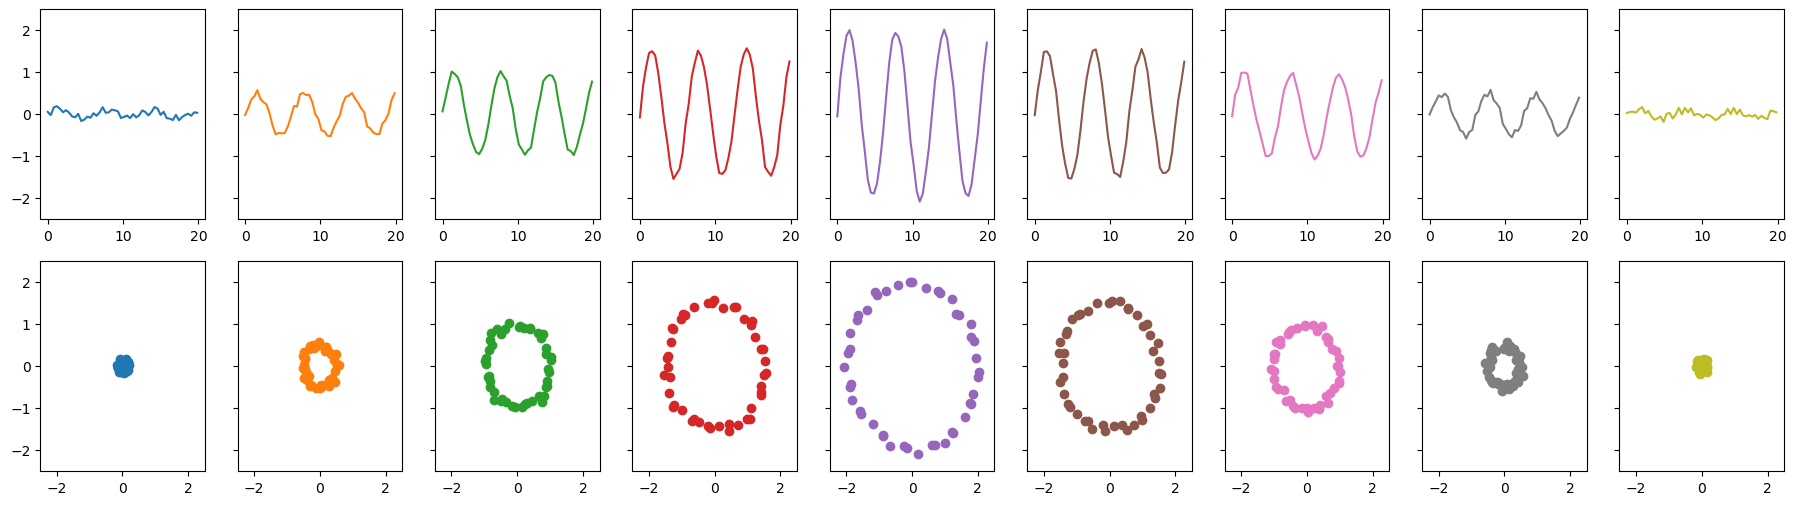

In [18]:
# Plot time series and corresponding point clouds
fig, axs = plt.subplots(2, len(amps) ,sharex = False, sharey=True, figsize=[len(amps)*2.5,2*3])
for i in range(len(amps)):
    axs[0,i].plot(t,ts_list[i],c='C'+str(i))
    axs[1,i].scatter(ptcloud_list[i][:,0], ptcloud_list[i][:,1],c='C'+str(i))
    axs[1,i].set_xlim([-2.5,2.5]); axs[1,i].set_ylim([-2.5,2.5])

In [27]:
# Setup zigzag with point clouds
ZZ = PtClouds(ptcloud_list, num_landmarks=25, verbose=True)

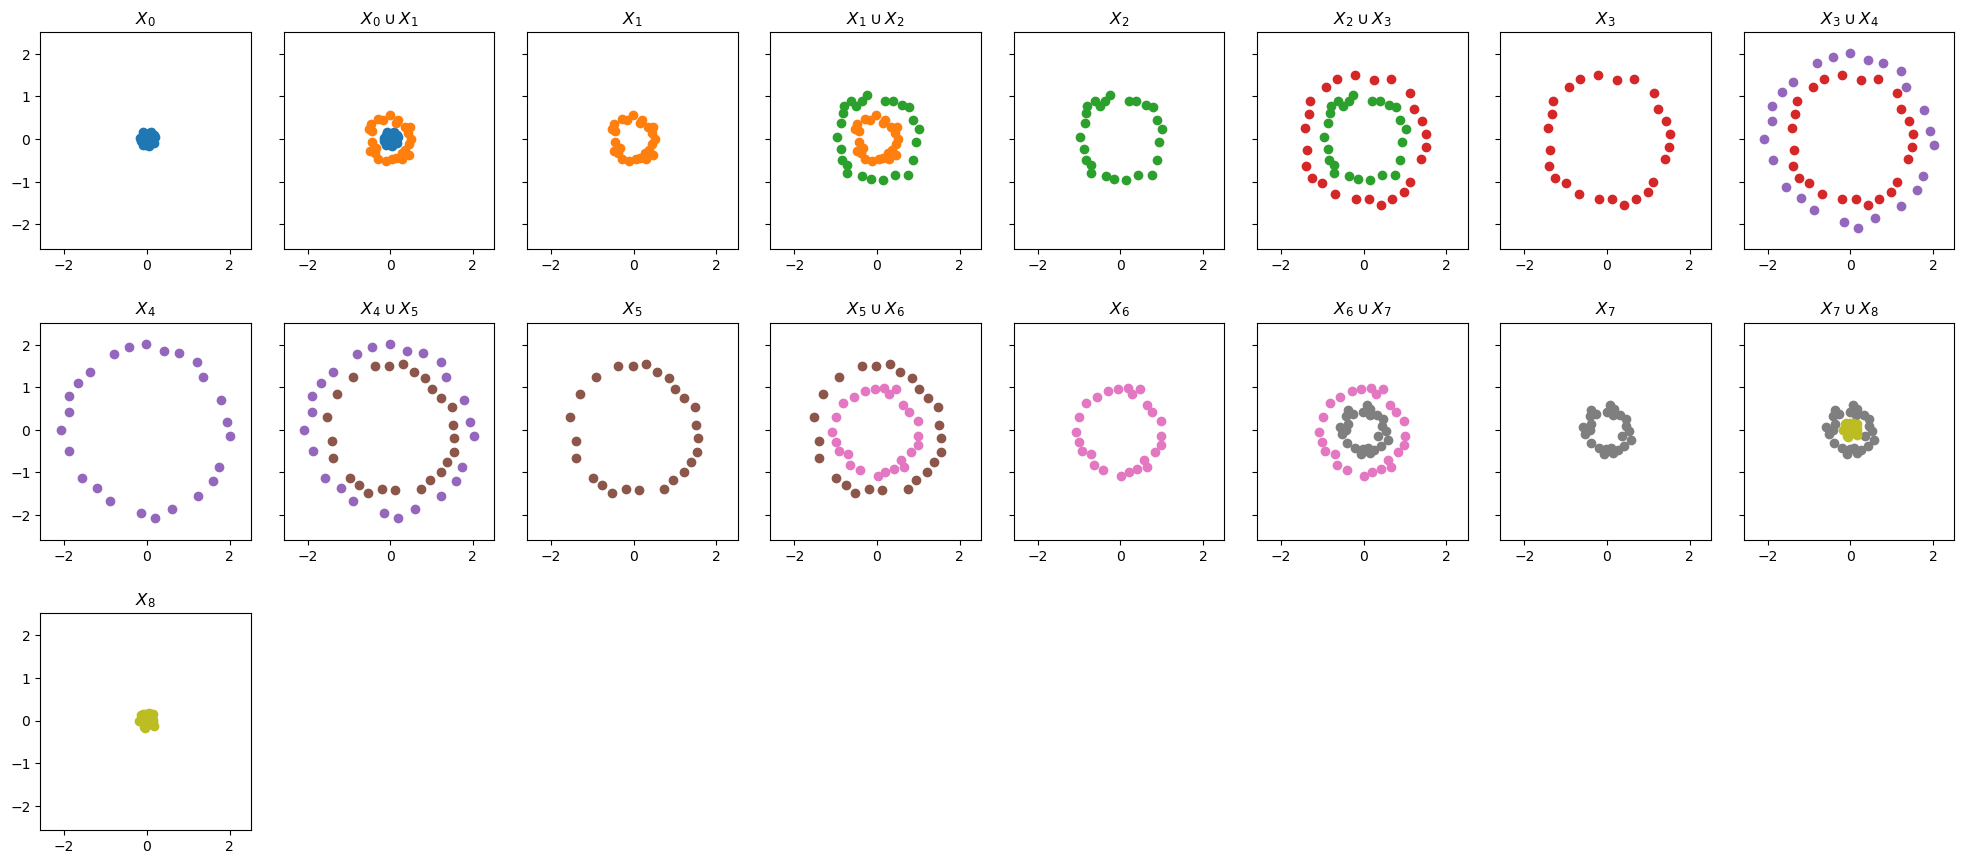

In [28]:
# Plot zigzag of point clouds
ZZ.plot_ZZ_PtClouds()

In [29]:
# Compute zigzag persistence
ZZ.run_Zigzag(r=0.85)

Initializing done in 0.011296987533569336 seconds...
Loop done in 1.5163609981536865 seconds...
Time to build filtration, times:  1.5637049674987793
Time to compute zigzag:  21.03684115409851
Total Time:  22.600818157196045 



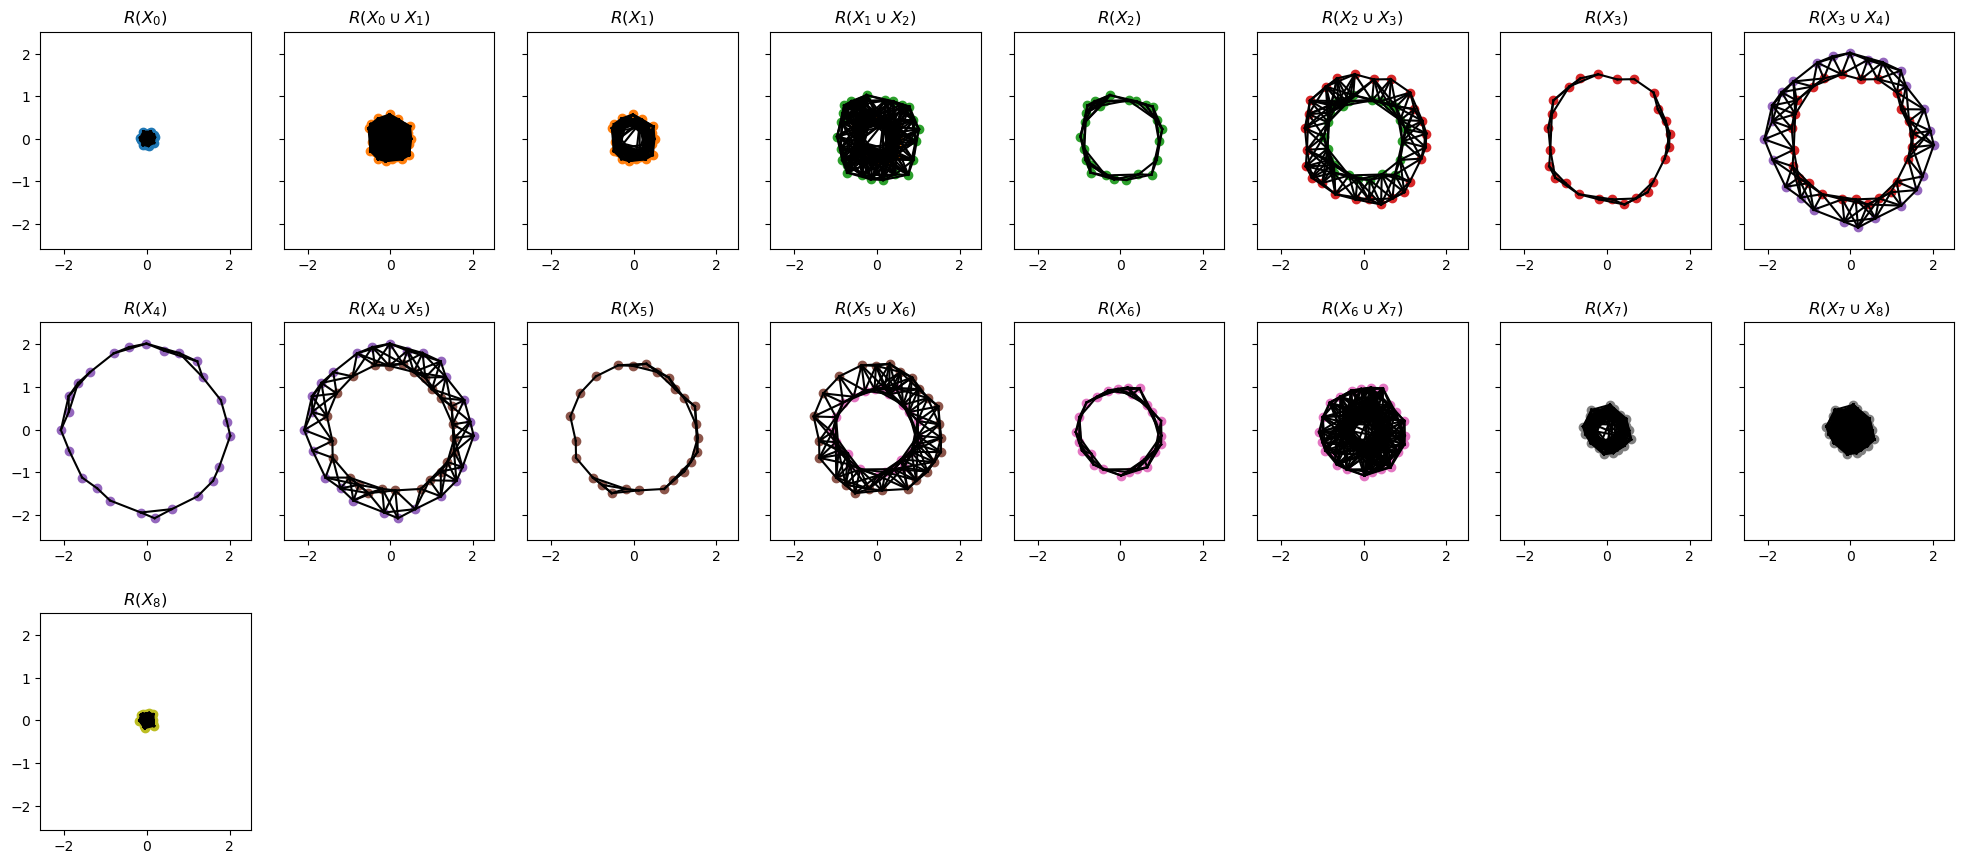

In [30]:
# Plot zigzag of Rips complexes
ZZ.plot_ZZ_Cplx()

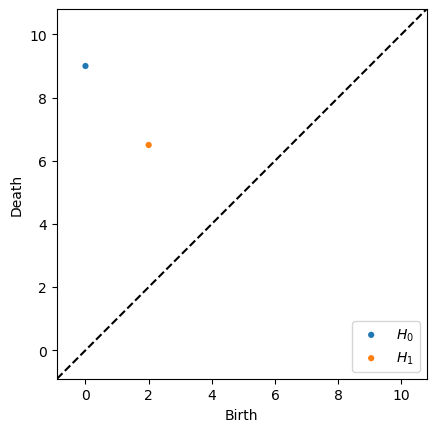

In [31]:
# Plot zigzag persistence diagram
plot_diagrams(ZZ.zz_dgms)